In [ ]:
import pandas as pd
import numpy as np
!pip install -U -q PyDrive
from pydrive.drive import GoogleDrive
from google.colab import drive

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# data_path = '/home/arsh/Jasleen/Spring 2023/NLP/Group Project/Authorship-Attribution-for-Neural-Text-Generation-master/data/'
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = 'drive/MyDrive/NLP/'

In [ ]:
data = pd.read_csv(data_path+'input.csv')
data.tail()

,text,class
11721,how much of your body is your own how much of ...,instructgpt
11722,how do you keep a space station clean how do y...,instructgpt
11723,the city where you pay a years rent up front t...,instructgpt
11724,the bbc news app gives you the best of bbc new...,instructgpt
11725,learn how the bbc is working to strengthen tru...,instructgpt


In [ ]:
# CRNN Model


import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Bidirectional

# Step 1: Load the data from the CSV file
# data = pd.read_csv('input.csv')
texts = data['text'].tolist()
classes = data['class'].tolist()


# Step 2: Convert the preprocessed text into numerical representations
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Step 3: Encode the class labels
label_encoder = LabelEncoder()
encoded_classes = label_encoder.fit_transform(classes)
num_classes = len(label_encoder.classes_)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_classes, test_size=0.2, random_state=42)

# Step 5: Define and train the CRNN model
model = Sequential()
model.add(Embedding(len(word_index) + 1, 100, input_length=max_sequence_length))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
294/294 [==============================] - 125s 407ms/step - loss: 1.6003 - accuracy: 0.3776 - val_loss: 1.1498 - val_accuracy: 0.5571
Epoch 2/10
294/294 [==============================] - 111s 377ms/step - loss: 0.9303 - accuracy: 0.6497 - val_loss: 0.8898 - val_accuracy: 0.6748
Epoch 3/10
294/294 [==============================] - 107s 365ms/step - loss: 0.5338 - accuracy: 0.8050 - val_loss: 0.8974 - val_accuracy: 0.6799
Epoch 4/10
294/294 [==============================] - 99s 336ms/step - loss: 0.3109 - accuracy: 0.8974 - val_loss: 0.9008 - val_accuracy: 0.7191
Epoch 5/10
294/294 [==============================] - 97s 329ms/step - loss: 0.1768 - accuracy: 0.9469 - val_loss: 1.0333 - val_accuracy: 0.7144
Epoch 6/10
294/294 [==============================] - 91s 310ms/step - loss: 0.1070 - accuracy: 0.9704 - val_loss: 1.1171 - val_accuracy: 0.7020
Epoch 7/10
294/294 [==============================] - 92s 313ms/step - loss: 0.0738 - accuracy: 0.9803 - val_loss: 1.1380 - val

In [ ]:
# FastText with parameter tuning


import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Load the data from the CSV file
# data = pd.read_csv('input.csv')
texts = data['text'].tolist()
classes = data['class'].tolist()

# Step 2: Tokenize and preprocess the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Step 3: Convert class labels to numeric values
label_encoder = LabelEncoder()
encoded_classes = label_encoder.fit_transform(classes)
num_classes = len(label_encoder.classes_)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    encoded_classes,
    test_size=0.2,
    random_state=42
)

# Step 5: Build the FastText model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 50, input_length=max_sequence_length))  # Reduced embedding dimension to 50
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Step 6: Compile and train the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Technique 1: Reduce the batch size
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=16,  # Reduced batch size to 16
    callbacks=[early_stopping]
)

# Technique 2: Limit the maximum sequence length
max_sequence_length = 100  # Set a smaller maximum sequence length

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    encoded_classes,
    test_size=0.2,
    random_state=42
)

model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 50, input_length=max_sequence_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

optimizer = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)

#


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 11887, 50)         7556400   
                                                                 
 global_average_pooling1d_2   (None, 50)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 64)                3264      
                                                                 
 dense_5 (Dense)             (None, 11)                715       
                                                                 
Total params: 7,560,379
Trainable params: 7,560,379
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
587/587 [==============================] - 86s 144ms/step - loss: 2.3916 - accuracy: 0.1117 - val_l

In [ ]:
# bilstm


import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Load the data from the CSV file
# data = pd.read_csv('input.csv')
texts = data['text'].tolist()
classes = data['class'].tolist()

# Step 2: Tokenize and preprocess the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Step 3: Convert class labels to numeric values
label_encoder = LabelEncoder()
encoded_classes = label_encoder.fit_transform(classes)
num_classes = len(label_encoder.classes_)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    encoded_classes,
    test_size=0.2,
    random_state=42
)

# Step 5: Build the BiLSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Step 6: Compile and train the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Define mini-batch size
batch_size = 32

# Calculate the number of steps per epoch
steps_per_epoch = len(X_train) // batch_size

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=batch_size,
    steps_per_epoch=steps_per_epoch,
    callbacks=[early_stopping]
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 11887, 100)        15112800  
                                                                 
 bidirectional (Bidirectiona  (None, 11887, 128)       84480     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 11)                715       
                                                                 
Total params: 15,305,067
Trainable params: 15,305,067
No

In [ ]:
# Bilstm with POS tagging


import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Load the data from the CSV file
# data = pd.read_csv('input.csv')
texts = data['text'].tolist()
classes = data['class'].tolist()

# Step 2: POS Tagging using NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

pos_tags = []
for text in texts:
    tokens = word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    pos_tags.append(" ".join([tag for _, tag in tags]))

# Step 3: Tokenize and preprocess the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Step 4: Convert class labels to numeric values
label_encoder = LabelEncoder()
encoded_classes = label_encoder.fit_transform(classes)
num_classes = len(label_encoder.classes_)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    encoded_classes,
    test_size=0.2,
    random_state=42
)

# Step 6: Build the BiLSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Step 7: Compile and train the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 11887, 100)        15112800  
                                                                 
 bidirectional_2 (Bidirectio  (None, 11887, 128)       84480     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 11)                715       
                                                                 
Total params: 15,305,067
Trainable params: 15,305,067


In [ ]:
# Step 8: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)



74/74 [==============================] - 36s 488ms/step - loss: 1.1732 - accuracy: 0.5895
Test Loss: 1.1731928586959839
Test Accuracy: 0.5895140767097473


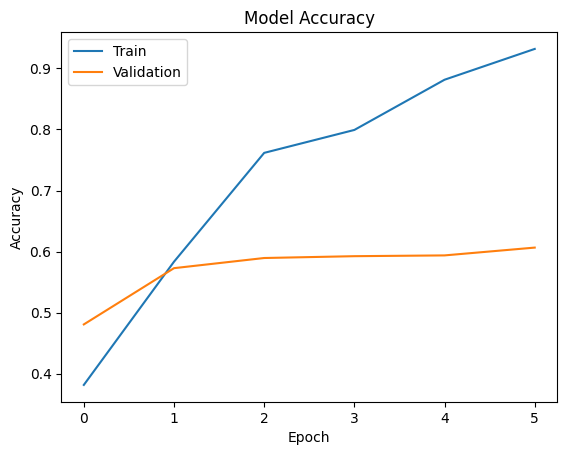

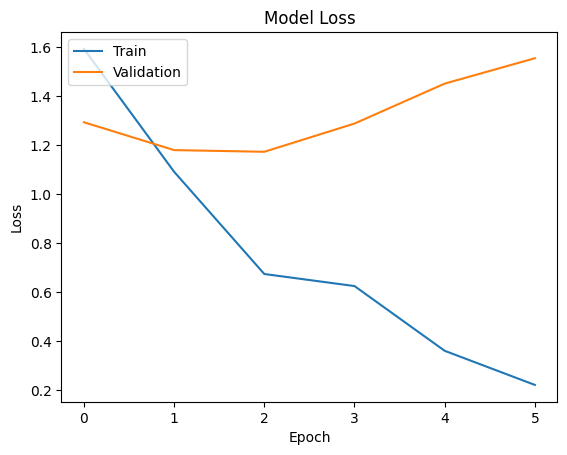

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# distil Bert

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import tensorflow as tf

# Step 2: Load and preprocess the data
# data = pd.read_csv('input.csv')
X = data['text']
y = data['class']

# Encode class labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Tokenize the sequences
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

X_train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
X_test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True)

# Step 4: Convert the encodings to TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train_encodings),
    y_train
)).shuffle(100).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test_encodings),
    y_test
)).batch(16)

# Step 5: Load and fine-tune the DistilBERT model
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(label_encoder.classes_))

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

model.fit(train_dataset, epochs=3, validation_data=test_dataset)




Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_transform', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'dropout_39', 'pre_classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

Epoch 1/3
587/587 [==============================] - 621s 1s/step - loss: 0.5436 - accuracy: 0.8357 - val_loss: 0.1600 - val_accuracy: 0.9412
Epoch 2/3
587/587 [==============================] - 596s 1s/step - loss: 0.1435 - accuracy: 0.9470 - val_loss: 0.1738 - val_accuracy: 0.9352
Epoch 3/3
147/147 [==============================] - 47s 319ms/step - loss: 0.1200 - accuracy: 0.9616


ValueError: ignored

In [ ]:
# Step 6: Evaluate the model
model.evaluate(test_dataset)

# Step 7: Make predictions with the model
new_text = ['Some new text generated by an NLG model']
new_text_encodings = tokenizer(new_text, truncation=True, padding=True, return_tensors='tf')

predicted_class = tf.argmax(model.predict(new_text_encodings)[0], axis=1).numpy()
predicted_class_label = label_encoder.inverse_transform(predicted_class)

print("Predicted Class:", predicted_class_label)

147/147 [==============================] - 44s 299ms/step - loss: 0.1200 - accuracy: 0.9616


ValueError: ignored

In [ ]:
# Step 7: Save the trained model
model.save_pretrained("/content/drive/MyDrive/distilbert_model")
tokenizer.save_pretrained("/content/drive/MyDrive/distilbert_model")

('/content/drive/MyDrive/distilbert_model/tokenizer_config.json',
 '/content/drive/MyDrive/distilbert_model/special_tokens_map.json',
 '/content/drive/MyDrive/distilbert_model/vocab.txt',
 '/content/drive/MyDrive/distilbert_model/added_tokens.json')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# ...

# Step 6: Evaluate the model
y_pred = model.predict(test_dataset)
y_pred = tf.argmax(y_pred.logits, axis=1).numpy()

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


147/147 [==============================] - 46s 295ms/step
Precision: 0.9616830378363798
Recall: 0.9616368286445013
F1 Score: 0.9613970512047321


In [ ]:
# Manually input a text
new_text = input("Enter the text: ")

# Tokenize the input text
new_text_encodings = tokenizer([new_text], truncation=True, padding=True, return_tensors='tf')

# Extract the input IDs and attention mask
input_ids = new_text_encodings['input_ids']
attention_mask = new_text_encodings['attention_mask']

# Predict the class label
predicted_class = tf.argmax(model.predict([input_ids, attention_mask])[0], axis=1).numpy()
predicted_class_label = label_encoder.inverse_transform(predicted_class)[0]

print("Predicted Class:", predicted_class_label)

Enter the text: tv shows to watch if youre in the mood to lean into your worries tv shows to watch if youre in the mood to lean into your worries in the long run there will probably be temptation to watch the latest season of netflix most of those lattles to the tune of 22 million a season as most people call them will be available with what i knownviewers dont really want to hang out with old what is guys that really is our default terminology here but its an opportunity for those who want to tell you about other mennthe networks newest series superhero place is one of a bunch of the silver black and white tv dramas on premiere nightnthe series shows four guys who are not quite crazy about having a baby the creators promise often thats because the decisions have changed sometimes they use how theyve been brought up and whats going on in their lives to make a differencenit really does have a sense of a lot of the characters were exploring and as writers we love bringing those people in